# **Libraries & Dependencies**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split

# **Load Data**

In [3]:
data = pd.read_csv('/content/gdrive/MyDrive/maven-churn/telecom_customer_churn.csv')
data_train, data_val = train_test_split(data, test_size=0.2, stratify=data['Customer Status'], random_state=55, shuffle=True)
del data
population = pd.read_csv('/content/gdrive/MyDrive/maven-churn/telecom_zipcode_population.csv')
data_dict = pd.read_csv('/content/gdrive/MyDrive/maven-churn/telecom_data_dictionary.csv', encoding='cp1252')

**Variable Definitions**

In [4]:
for i, row in data_dict.iloc[3:].iterrows():
    print(f"{row['Field']:<35}", ': ', row['Description'], sep='')

Married                            : Indicates if the customer is married: Yes, No
Number of Dependents               : Indicates the number of dependents that live with the customer (dependents could be children, parents, grandparents, etc.)
City                               : The city of the customer’s primary residence in California
Zip Code                           : The zip code of the customer’s primary residence
Latitude                           : The latitude of the customer’s primary residence
Longitude                          : The longitude of the customer’s primary residence
Number of Referrals                : Indicates the number of times the customer has referred a friend or family member to this company to date
Tenure in Months                   : Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above
Offer                              : Identifies the last marketing offer that the customer accepted

**Drop Irrelevant Columns**

Some of the columns in the dataset is irrelevant for the analysis and modeling process that will be performed. These includes the column(s) `Customer ID`, `Latitude`, and `Longitude`. So, these columns are going to be dropped.

In [5]:
data_train.drop(['Customer ID', 'Latitude', 'Longitude'], axis=1, inplace=True)
data_val.drop(['Customer ID', 'Latitude', 'Longitude'], axis=1, inplace=True)

# **Data Wrangling**

Before conducting Exploratory Data Analysis and Modeling, first the data needs to be preprocessed and prepared first. The steps include:

- Data Discovery
- Data Transformation & Structuring
- Data Cleaning:
  - Handle Duplicates, Missing Values

### **Initial Data Discovery**

This part is just for the initial understanding of what the dataset roughly looks like.

In [6]:
data_train.iloc[:,:18].head()

,Gender,Age,Married,Number of Dependents,City,Zip Code,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan
822,Female,24,Yes,0,Korbel,95550,4,12,Offer D,Yes,23.99,No,Yes,DSL,51.0,Yes,No,No
3967,Male,41,Yes,0,Alhambra,91803,1,1,Offer E,Yes,19.15,No,Yes,Fiber Optic,18.0,No,No,No
1860,Male,40,No,0,Corona Del Mar,92625,0,11,NaN,Yes,44.94,No,Yes,Fiber Optic,25.0,No,No,No
2500,Male,47,No,0,Castro Valley,94546,0,45,NaN,Yes,40.59,No,No,NaN,NaN,NaN,NaN,NaN
5205,Female,45,Yes,0,Paskenta,96074,1,2,Offer E,Yes,7.70,No,Yes,Fiber Optic,22.0,No,No,No


In [7]:
data_train.iloc[:,18:].head()

,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
822,Yes,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,54.20,690.50,0.0,0,287.88,978.38,Stayed,NaN,NaN
3967,No,No,No,No,No,Month-to-Month,No,Bank Withdrawal,70.00,70.00,0.0,10,19.15,99.15,Churned,Other,Don't know
1860,Yes,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.85,926.25,0.0,0,494.34,1420.59,Churned,Other,Moved
2500,NaN,NaN,NaN,NaN,NaN,One Year,No,Bank Withdrawal,18.85,867.30,0.0,0,1826.55,2693.85,Stayed,NaN,NaN
5205,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,70.35,120.25,0.0,20,15.40,155.65,Joined,NaN,NaN


In [8]:
population.head()

,Zip Code,Population
0,90001,54492
1,90002,44586
2,90003,58198
3,90004,67852
4,90005,43019


In [9]:
data_train.shape

(5634, 35)

In [10]:
data_train.dtypes

Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited 

In [11]:
num_cols = ['Age', 'Number of Dependents', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
            'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']
cat_cols = ['Gender', 'Married', 'City', 'Zip Code', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type',
            'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
            'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Customer Status', 'Churn Category', 'Churn Reason']

In [12]:
set(data_train.columns) - set(num_cols) - set(cat_cols)

set()

##### **Univariate Analysis**

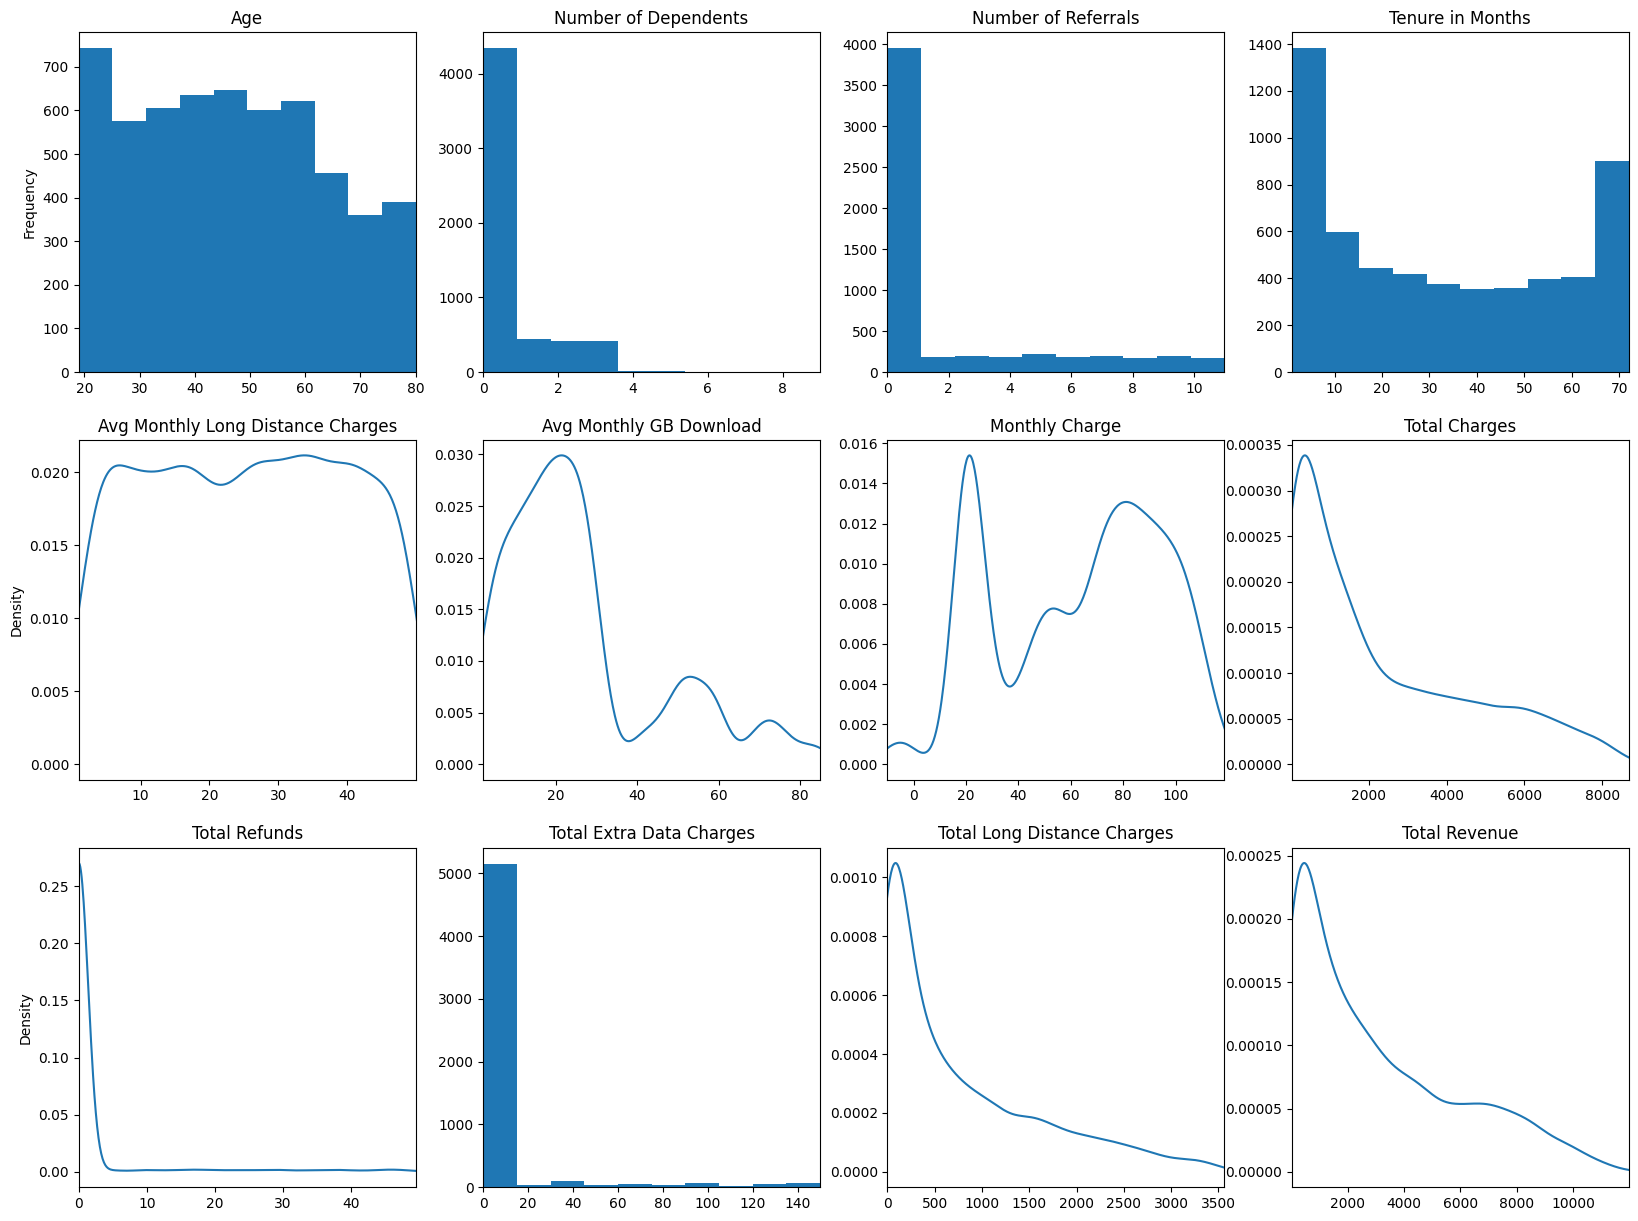

In [13]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols):
    plt.subplot(3, 4, i+1)
    if data_train[col].dtype == 'int':
        data_train[col].dropna().plot(kind='hist')
    elif data_train[col].dtype == 'float':
        data_train[col].dropna().plot(kind='density')
    plt.title(col)
    if i % 4 != 0:
        plt.ylabel('')
    plt.xlim(min(data_train[col].dropna()), max(data_train[col].dropna()))
plt.show()

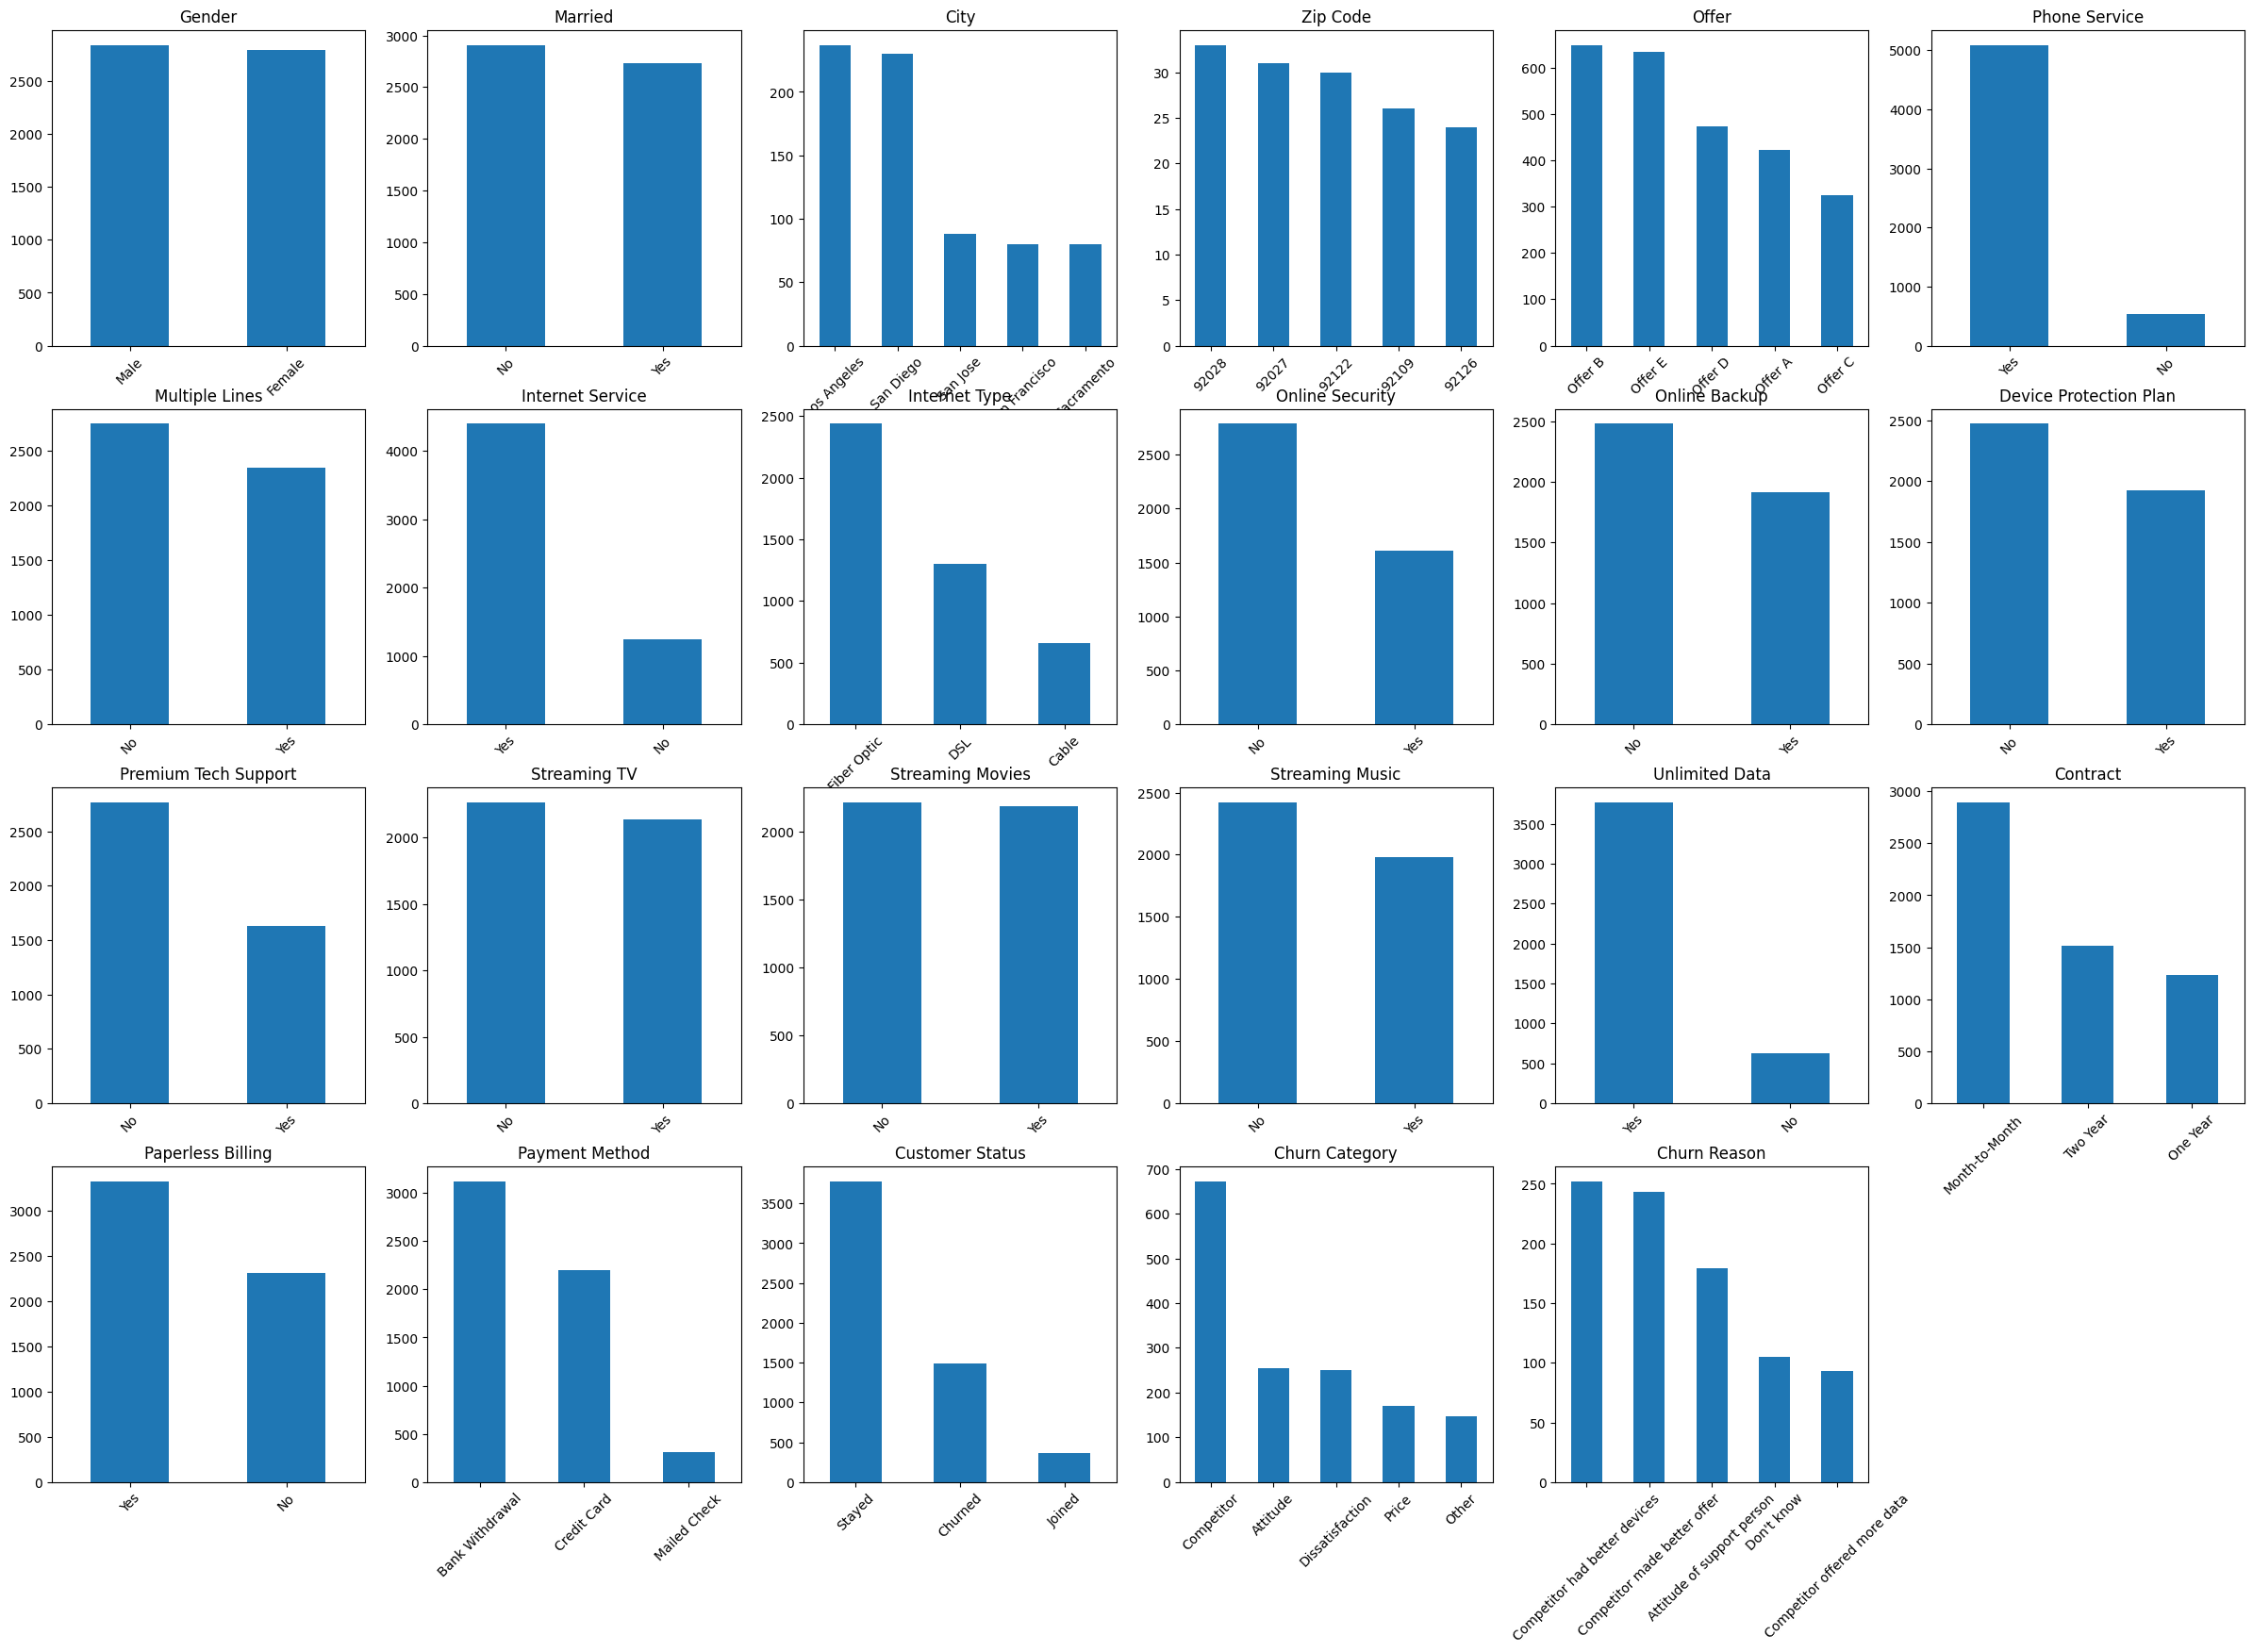

In [14]:
plt.figure(figsize=(30, 20))
for i, col in enumerate(cat_cols):
    plt.subplot(4, 6, i+1)
    if len(data_train[col].value_counts()) >= 20:
        data_train[col].value_counts()[:5].plot(kind='bar')
    else:
        data_train[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xlabel('')
    plt.xticks(rotation=45)
plt.show()

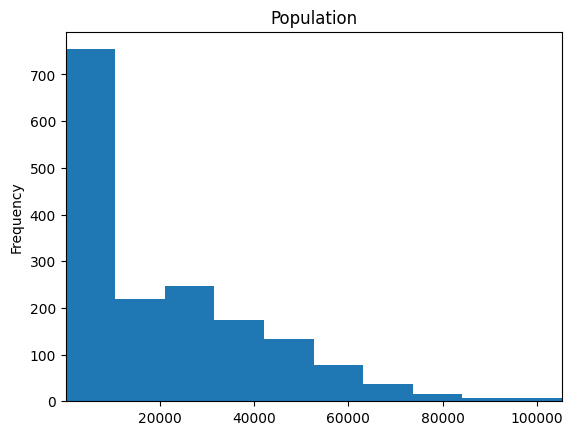

In [15]:
population['Population'].dropna().plot(kind='hist')
plt.title('Population')
plt.xlim(min(population['Population'].dropna()), max(population['Population'].dropna()))
plt.show()

##### **Bivariate Analysis**

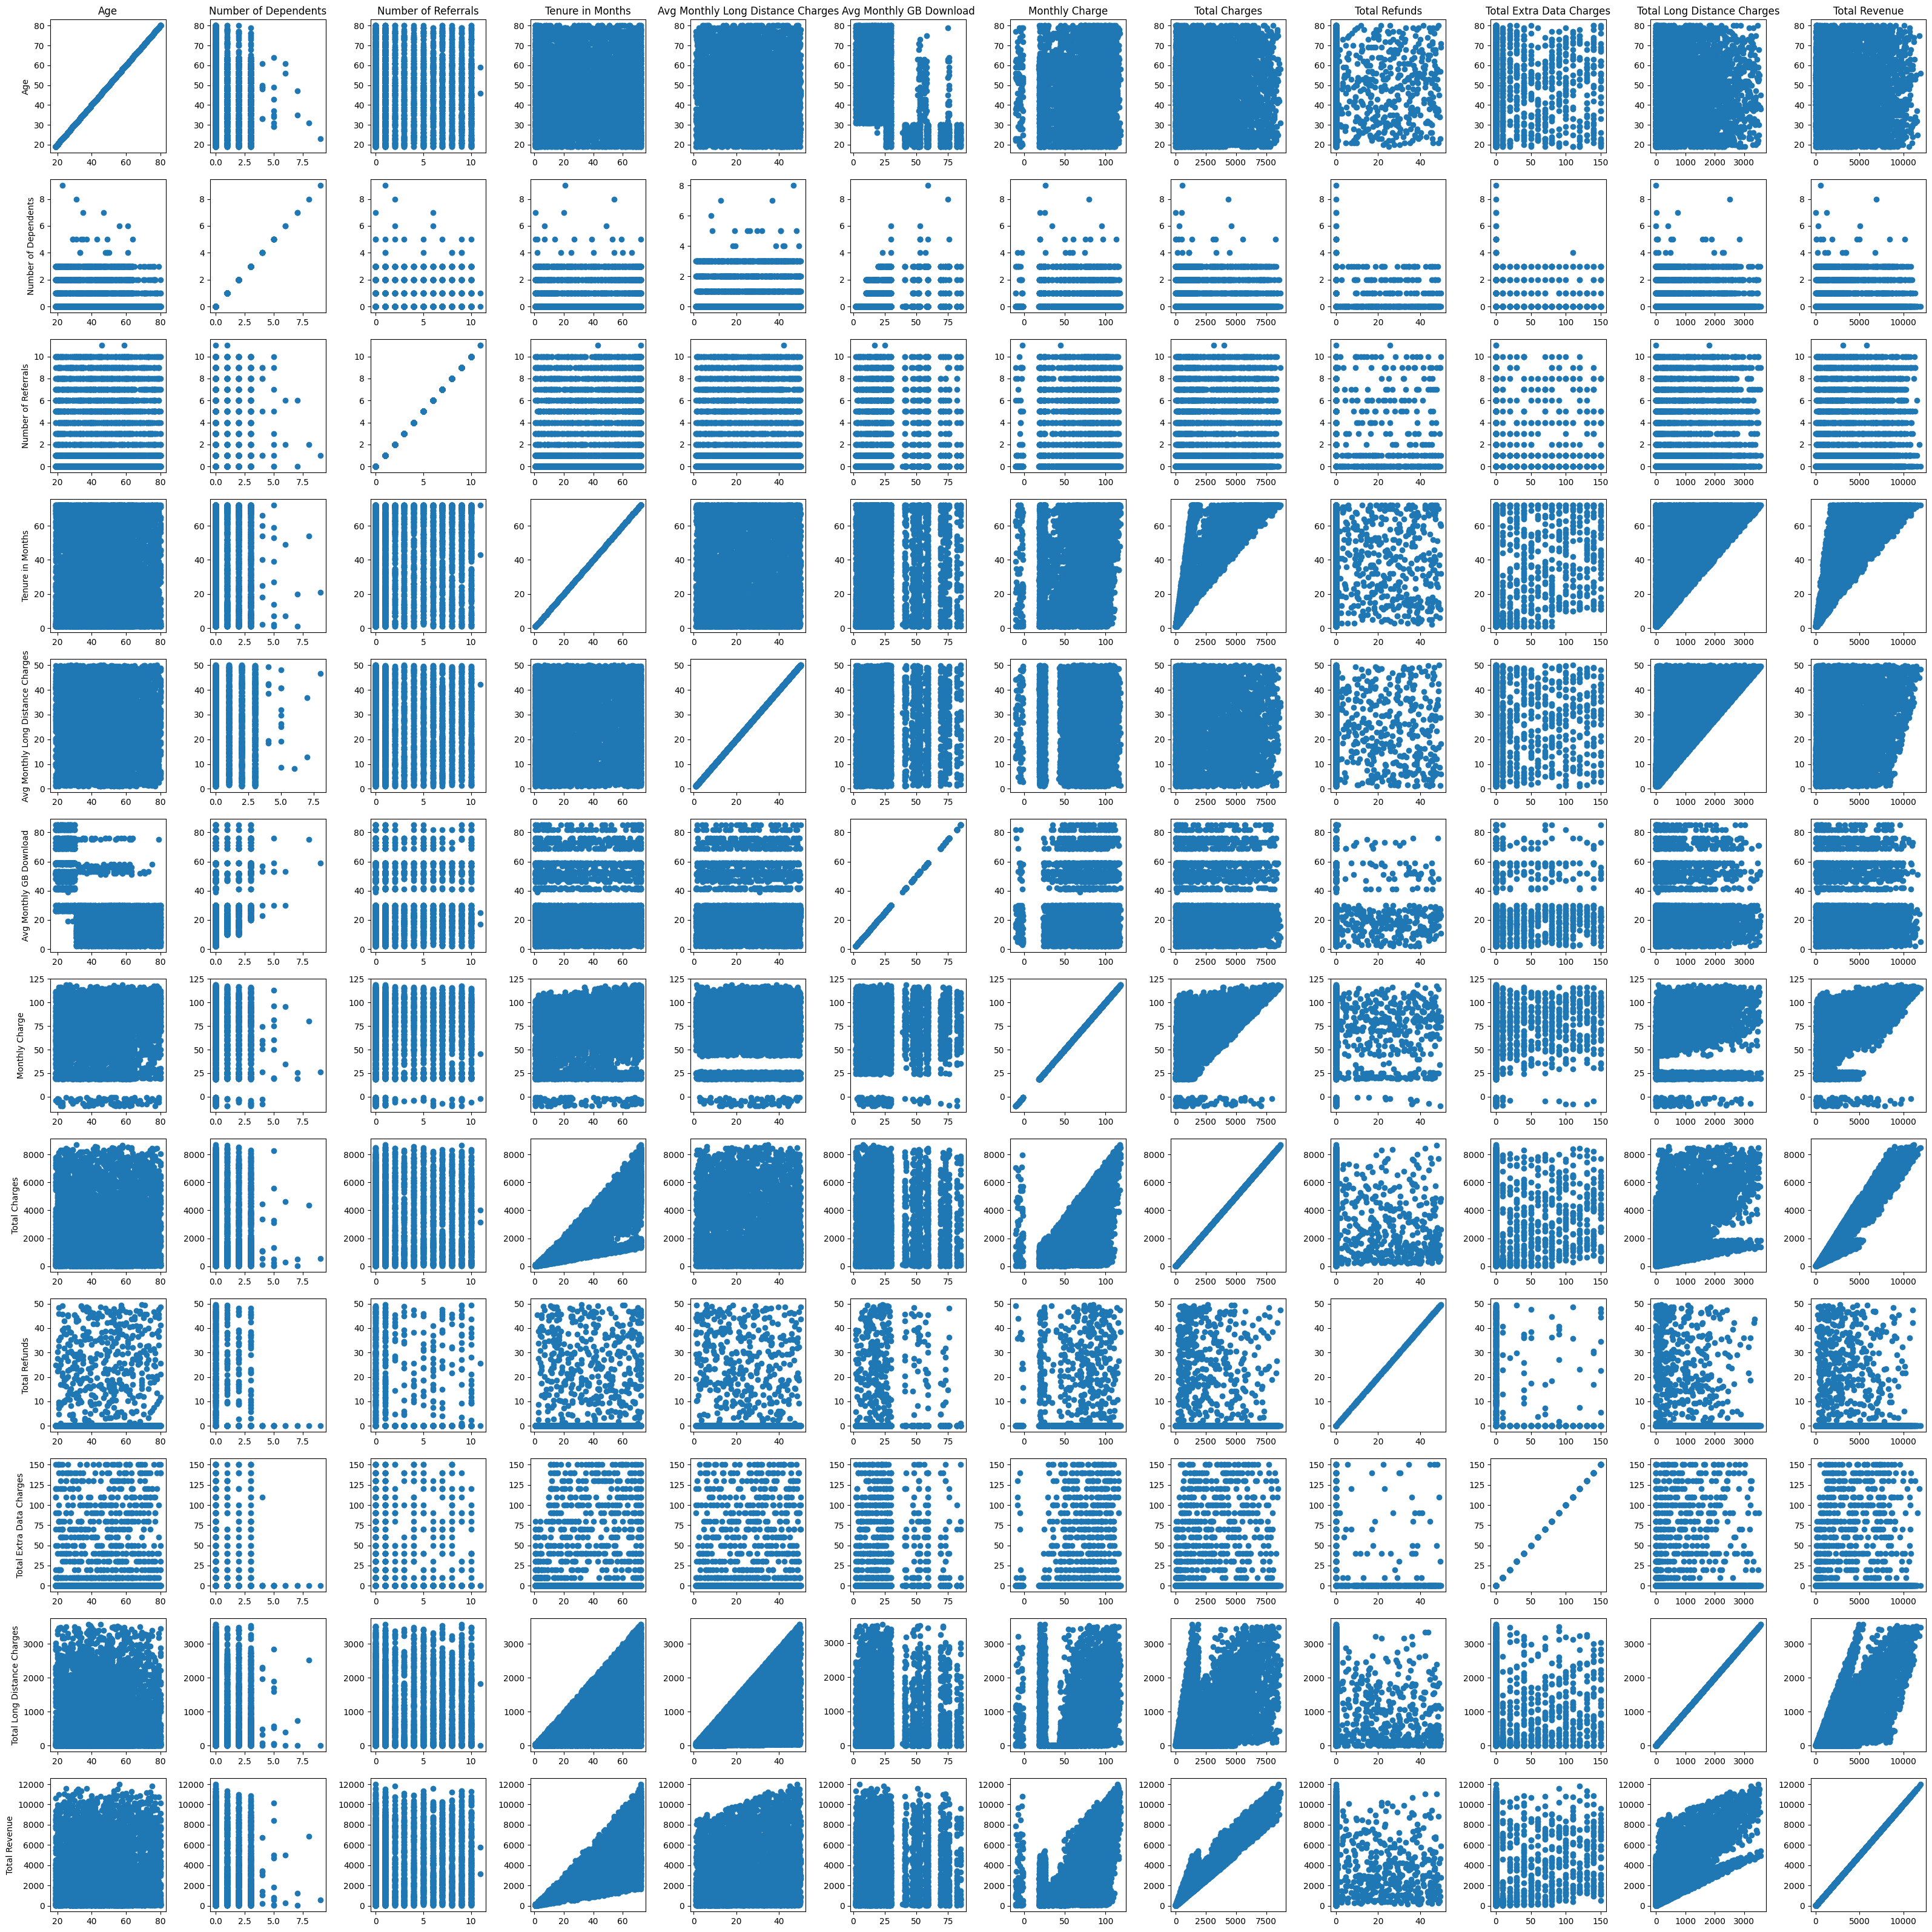

In [16]:
plt.figure(figsize=(32, 32))
idx = 1
for i, col_1 in enumerate(num_cols):
    for j, col_2 in enumerate(num_cols):
        plt.subplot(12, 12, idx)
        plt.scatter(data_train[col_2], data_train[col_1])
        if (idx-1) % 12 == 0:
            plt.ylabel(col_1)
        if idx <= 12:
            plt.title(col_2)
        idx += 1
plt.tight_layout()
plt.show()

### **Data Transformation & Structuring**

In this part, the `population` data which contains the number of population in each zip code will be joined into the main dataset.

In [17]:
data_train = data_train.merge(population[['Zip Code', 'Population']], on='Zip Code', how='left')
data_val = data_val.merge(population[['Zip Code', 'Population']], on='Zip Code', how='left')

In [18]:
num_cols.append('Population')

The response variable `Customer Status` categorizes the customers into 3 categories: `Stayed`, `Churned`, and `Joined`. In this project, the point of interest is classifying which customers will churn. So let's combine `Stayed` and `Joined` into a single category.

In [19]:
data_train['Customer Status'].replace('Joined', 'Stayed', inplace=True)
data_val['Customer Status'].replace('Joined', 'Stayed', inplace=True)

Next, the dataset columns will be converted into the appropriate and correct data types.

In [20]:
data_train[cat_cols] = data_train[cat_cols].astype('category')
data_val[cat_cols] = data_val[cat_cols].astype('category')

### **Data Cleaning**

The dataset used is still "dirty". So, it needs to be "cleaned" first before proceeding. This will be done by checking for **duplicates** on the dataset, as well as taking care of **missing values**.

##### **Handle Duplicates**

In [21]:
data_train.duplicated().sum()

0

In [22]:
data_val.duplicated().sum()

0

It seems like there is no duplicates in the dataset. So that's a good thing, and nothing else needs to be done here.

##### **Handle Missing Values**

In [23]:
data_train.isna().sum()

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3129
Phone Service                           0
Avg Monthly Long Distance Charges     543
Multiple Lines                        543
Internet Service                        0
Internet Type                        1238
Avg Monthly GB Download              1238
Online Security                      1238
Online Backup                        1238
Device Protection Plan               1238
Premium Tech Support                 1238
Streaming TV                         1238
Streaming Movies                     1238
Streaming Music                      1238
Unlimited Data                       1238
Contract                          

In [24]:
data_val.isna().sum()

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Number of Referrals                     0
Tenure in Months                        0
Offer                                 748
Phone Service                           0
Avg Monthly Long Distance Charges     139
Multiple Lines                        139
Internet Service                        0
Internet Type                         288
Avg Monthly GB Download               288
Online Security                       288
Online Backup                         288
Device Protection Plan                288
Premium Tech Support                  288
Streaming TV                          288
Streaming Movies                      288
Streaming Music                       288
Unlimited Data                        288
Contract                          

**Offer**

In [25]:
data_train['Offer'].value_counts()

Offer
Offer B    649
Offer E    635
Offer D    474
Offer A    423
Offer C    324
Name: count, dtype: int64

For the `Offer` variable, it seems that the missing values are because some of the customers are not given any offers. So let's leave them as they are.

**Avg Monthly Long Distance Charges** and **Multiple Lines**

In [26]:
data_train[data_train['Avg Monthly Long Distance Charges'].isna() & data_train['Multiple Lines'].isna()].iloc[:,:18].head()

,Gender,Age,Married,Number of Dependents,City,Zip Code,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan
9,Female,38,No,0,Fiddletown,95629,0,62,Offer B,No,NaN,NaN,Yes,Cable,30.0,No,Yes,Yes
13,Female,41,No,0,Shasta Lake,96019,0,20,NaN,No,NaN,NaN,Yes,DSL,21.0,No,No,No
23,Female,51,No,0,Berkeley,94705,0,22,NaN,No,NaN,NaN,Yes,Cable,22.0,No,Yes,No
27,Female,69,No,0,Twain,95984,0,1,Offer E,No,NaN,NaN,Yes,DSL,21.0,No,No,No
39,Female,29,No,0,Baker,92309,0,6,NaN,No,NaN,NaN,Yes,Cable,48.0,No,No,No


In [27]:
data_train[data_train['Avg Monthly Long Distance Charges'].isna() & data_train['Multiple Lines'].isna()]['Phone Service'].value_counts()

Phone Service
No     543
Yes      0
Name: count, dtype: int64

Both the `Avg Monthly Long Distance Charges` and `Multiple Lines` variables are `NaN` when the value of `Phone Service` is `No`.

Let's set the missing values of `Avg Monthly Long Distance Charges` to 0, and leave the missing values of `Multiple Lines` as they are, because it is a categorical variable.

In [28]:
data_train['Avg Monthly Long Distance Charges'].fillna(0, inplace=True)
data_val['Avg Monthly Long Distance Charges'].fillna(0, inplace=True)

**Internet Type**, **Avg Monthly GB Download**, **Online Security**, **Online Backup**, **Device Protection Plan**, **Premium Tech Support**, **Streaming TV**, **Streaming Movies**, **Streaming Music**, and **Unlimited Data**

In [29]:
data_train[data_train['Internet Type'].isna()].iloc[:,:18].head()

,Gender,Age,Married,Number of Dependents,City,Zip Code,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan
3,Male,47,No,0,Castro Valley,94546,0,45,NaN,Yes,40.59,No,No,NaN,NaN,NaN,NaN,NaN
8,Female,45,Yes,3,River Pines,95675,5,64,Offer B,Yes,17.93,Yes,No,NaN,NaN,NaN,NaN,NaN
22,Female,56,Yes,2,Brownsville,95919,3,36,Offer C,Yes,20.57,No,No,NaN,NaN,NaN,NaN,NaN
31,Male,34,No,0,San Andreas,95249,0,53,Offer B,Yes,39.37,Yes,No,NaN,NaN,NaN,NaN,NaN
32,Female,64,No,0,Farmersville,93223,0,17,Offer D,Yes,9.84,Yes,No,NaN,NaN,NaN,NaN,NaN


In [30]:
data_train[data_train['Internet Type'].isna()].iloc[:,18:].head()

,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Population
3,NaN,NaN,NaN,NaN,NaN,One Year,No,Bank Withdrawal,18.85,867.30,0.00,0,1826.55,2693.85,Stayed,NaN,NaN,41698
8,NaN,NaN,NaN,NaN,NaN,Two Year,Yes,Mailed Check,24.05,1559.15,0.00,0,1147.52,2706.67,Stayed,NaN,NaN,364
22,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Bank Withdrawal,19.20,702.90,0.00,0,740.52,1443.42,Stayed,NaN,NaN,1237
31,NaN,NaN,NaN,NaN,NaN,One Year,No,Bank Withdrawal,24.05,1301.90,0.00,0,2086.61,3388.51,Stayed,NaN,NaN,3930
32,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Credit Card,24.80,475.25,37.06,0,167.28,605.47,Stayed,NaN,NaN,8644


In [31]:
data_train[data_train['Internet Type'].isna()]['Internet Service'].value_counts()

Internet Service
No     1238
Yes       0
Name: count, dtype: int64

The values of the `Internet Type`, `Avg Monthly GB Download`, `Online Security`, `Online Backup`, `Device Protection Plan`, `Premium Tech Support`, `Streaming TV`, `Streaming Movies`, `Streaming Music`, and `Unlimited Data` variables are `NaN` when the value of `Internet Service` is `No`.

Just like before, for the categorical variables, like `Internet Type`, `Online Security`, `Online Backup`, `Device Protection Plan`, `Premium Tech Support`, `Streaming TV`, `Streaming Movies`, `Streaming Music`, and `Unlimited Data`, the missing values will be left as they are, but for the numerical variables like `Avg Monthly GB Download`, the missing values will be replaced with 0.

In [32]:
data_train['Avg Monthly GB Download'].fillna(0, inplace=True)
data_val['Avg Monthly GB Download'].fillna(0, inplace=True)

# **Exploratory Data Analysis**

Let's try to extract meaningful patterns and insights from the dataset by performing **EDA**.

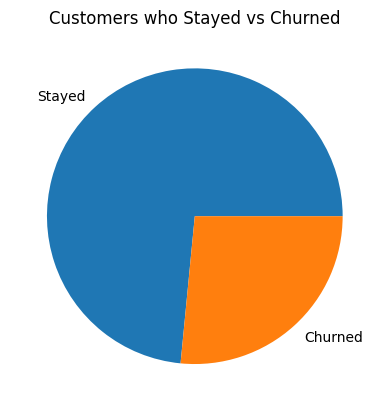

In [35]:
data_train['Customer Status'].value_counts().plot(kind='pie')
plt.title('Customers who Stayed vs Churned')
plt.axis('off')
plt.show()

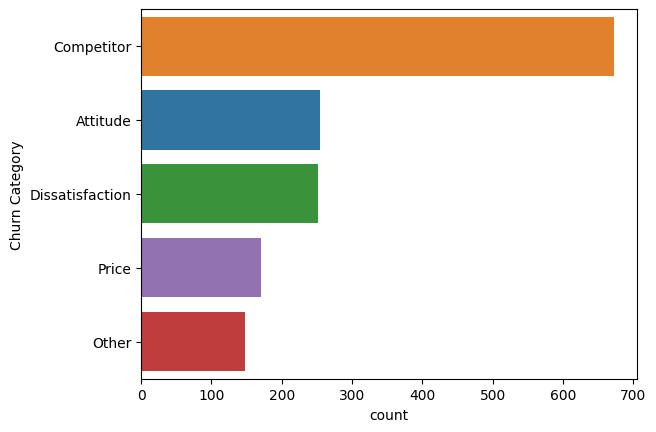

In [45]:
sns.countplot(data=data_train, y='Churn Category', order=data_train['Churn Category'].value_counts().index, hue='Churn Category')
plt.legend().set_visible(False)
plt.show()

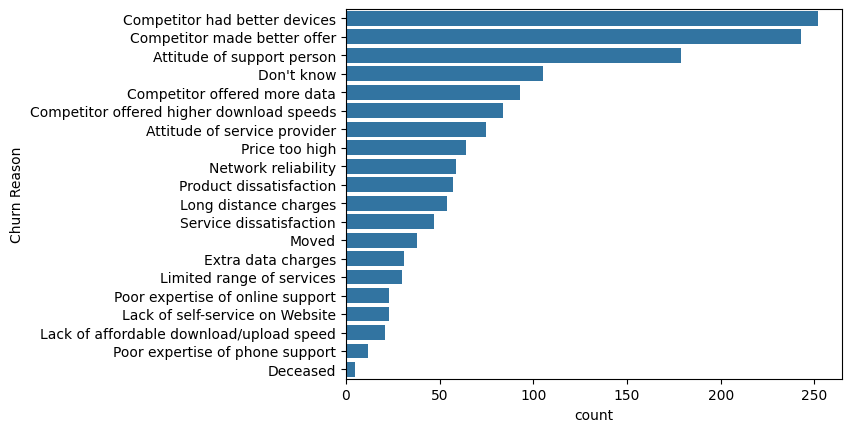

In [46]:
sns.countplot(data=data_train, y='Churn Reason', order=data_train['Churn Reason'].value_counts().index)
plt.show()

In [47]:
fig = px.histogram(data_train, x='Customer Status', color='Contract', barmode='group', title='Customer Contract Distribution')
fig.show()

In [48]:
fig = px.histogram(data_train, x='Customer Status', color='Married', barmode='group', title='Customer Marriage Status Distribution')
fig.show()

# **Handle Imbalance**

Notice that the dataset is **imbalanced**, with significantly less churned customers than non-churned ones. **Oversampling** and **Undersampling** are among the most commonly used techniques that can be used to address this issue, which works by adjusting the class distribution of the dataset. For this project, the **oversampling** approach is going to be used to tackle the imbalance problem.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

X_train = data_train.drop(['Customer Status'], axis=1)
y_train = data_train['Customer Status']

ros = RandomOverSampler(sampling_strategy=0.5)
X_train, y_train = ros.fit_resample(X_train, y_train)

data_train = pd.concat([X_train, y_train], axis=1)

# **Model**

Now, the data is already well prepared and preprocessed, and it is ready to be fed into the model.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

### **Drop Useless Columns**

In [ ]:
drop_cols = ['City', 'Zip Code', 'Churn Category', 'Churn Reason']

data_train.drop(drop_cols, axis=1, inplace=True)
data_val.drop(drop_cols, axis=1, inplace=True)

### **Label Encoding**

In [ ]:
data_train['Customer Status'].replace({'Stayed': 0, 'Churned': 1}, inplace=True)
data_val['Customer Status'].replace({'Stayed': 0, 'Churned': 1}, inplace=True)

### **Split Features and Labels**

In [ ]:
X_train = data_train.drop(['Customer Status'], axis=1)
y_train = data_train['Customer Status']

X_val = data_val.drop(['Customer Status'], axis=1)
y_val = data_val['Customer Status']

### **Parameter Tuning**

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 400, 800],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.1, 0.01],
    'reg_lambda': [0, 10],
}

optimal_params = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic', enable_categorical=True),
                              param_grid=param_grid,
                              cv=5,
                              verbose=3,
                              scoring='f1',
                              return_train_score=True,
                              refit=False,
                              ).fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END learning_rate=0.1, max_depth=4, n_estimators=100, reg_lambda=0;, score=(train=0.839, test=0.761) total time=   0.3s
[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=100, reg_lambda=0;, score=(train=0.842, test=0.766) total time=   0.3s
[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=100, reg_lambda=0;, score=(train=0.840, test=0.765) total time=   4.8s
[CV 4/5] END learning_rate=0.1, max_depth=4, n_estimators=100, reg_lambda=0;, score=(train=0.848, test=0.752) total time=   2.6s
[CV 5/5] END learning_rate=0.1, max_depth=4, n_estimators=100, reg_lambda=0;, score=(train=0.826, test=0.815) total time=   0.2s
[CV 1/5] END learning_rate=0.1, max_depth=4, n_estimators=100, reg_lambda=10;, score=(train=0.814, test=0.764) total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=100, reg_lambda=10;, score=(train=0.819, test=0.750) total time=   0.2s
[CV 3/5] END learning_rate=0.1, m

### **Build & Train Model**

In [ ]:
model = xgb.XGBClassifier(objective='binary:logistic', enable_categorical=True,
                          n_estimators=100,
                          max_depth=4,
                          learning_rate=0.1,
                          reg_lambda=1)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### **Prediction**

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

In [ ]:
np.unique(y_pred_val, return_counts=True)

(array([0, 1]), array([1018,  391]))

### **Evaluation**

In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
print('Train:')
print(classification_report(y_train, y_pred_train))
print()
print('==========')
print()
print('Val:')
print(classification_report(y_val, y_pred_val))

Train:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      4139
           1       0.83      0.82      0.83      2069

    accuracy                           0.88      6208
   macro avg       0.87      0.87      0.87      6208
weighted avg       0.88      0.88      0.88      6208



Val:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1035
           1       0.71      0.74      0.73       374

    accuracy                           0.85      1409
   macro avg       0.81      0.82      0.81      1409
weighted avg       0.85      0.85      0.85      1409



In [ ]:
print('Train F1 :', f1_score(y_train, y_pred_train, average='binary'))
print('Val F1   :', f1_score(y_val, y_pred_val, average='binary'))

Train F1 : 0.8255504476167432
Val F1   : 0.726797385620915


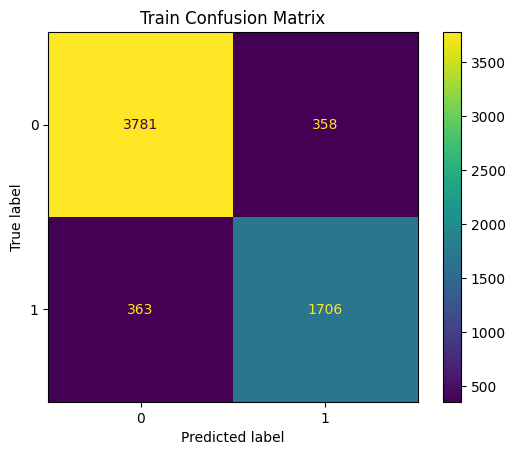

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred_train)).plot()
plt.title('Train Confusion Matrix')
plt.show()

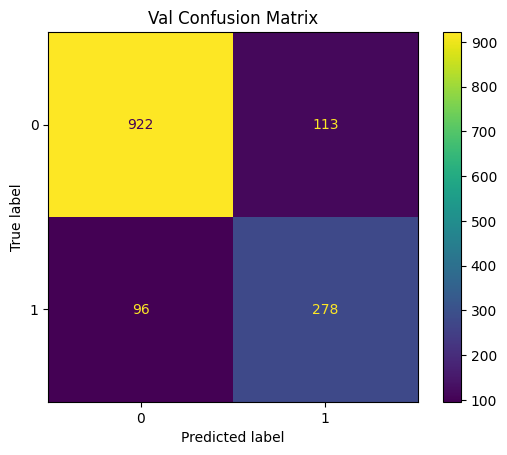

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_val, y_pred_val)).plot()
plt.title('Val Confusion Matrix')
plt.show()